In [42]:
import scipy.io.wavfile, scipy.signal, sounddevice
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib import cm
from matplotlib.ticker import ScalarFormatter
from timeit import default_timer as timer
import pandas as pd
from datetime import datetime

plt.rcParams["figure.dpi"] = 120

In [43]:
x_csv = pd.read_csv("Train.csv")
x = np.genfromtxt("Train.csv", delimiter=",", skip_header=1)
N = len(x)
X = abs(np.fft.fft(x[:, 2]) / N)[: N // 2]
# 1
# a
Fs = 1 / 3600

In [44]:
# b
# normal la cap:
# interval = len(x)

# tampit:
first_day = datetime.strptime(x_csv["Datetime"].iloc[1], "%d-%m-%Y %H:%M")
last_day = datetime.strptime(x_csv["Datetime"].iloc[-1], "%d-%m-%Y %H:%M")

interval_ore = last_day - first_day
interval_ore = interval_ore.total_seconds() / 3600 + 1
print(f"{interval_ore}H = {interval_ore / 24}Z = {interval_ore *3600 }s")

18287.0H = 761.9583333333334Z = 65833200.0s


In [45]:
# c
freq_max = Fs / 2
freq_max

0.0001388888888888889

array([138.95811461,  66.85385766,  35.21917298, ...,   0.39618267,
         0.41367487,   0.37676309])

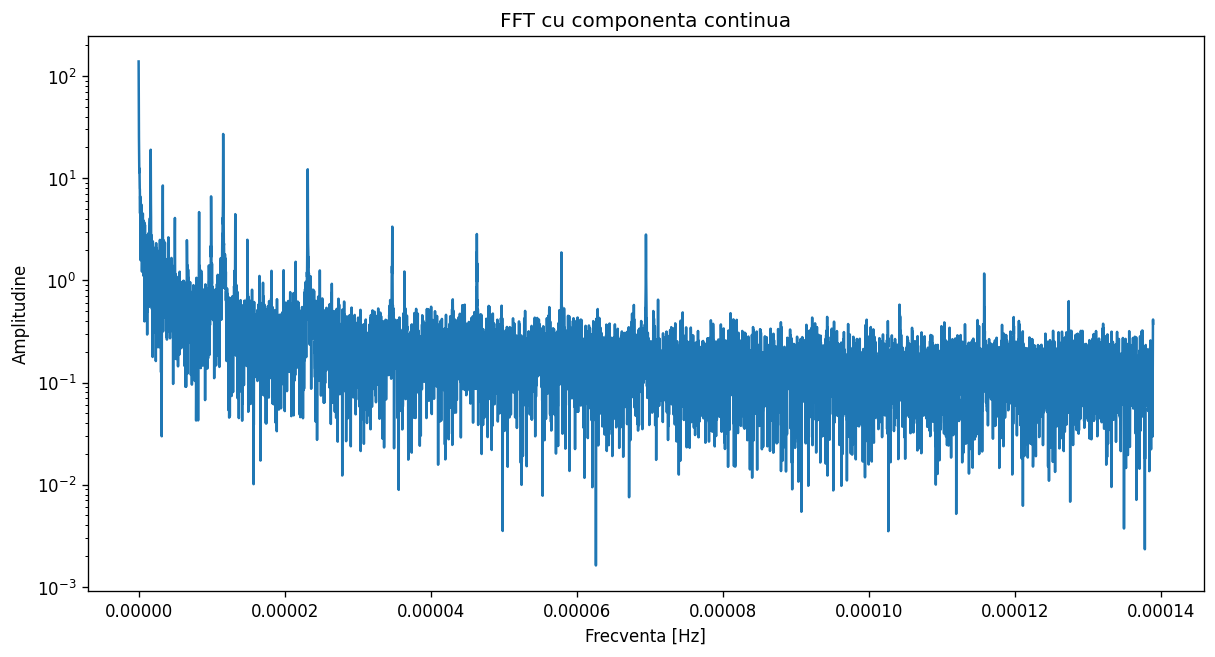

In [46]:
# d
f = Fs * np.linspace(0, N // 2, N // 2) / N

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(f, X)
ax.set_title("FFT cu componenta continua")
ax.set_xlabel("Frecventa [Hz]")
ax.set_ylabel("Amplitudine")
ax.set_yscale("log")
# ax.set_xscale("log")

# plt.setp(baseline, linewidth=0)

plt.plot()
X

[]

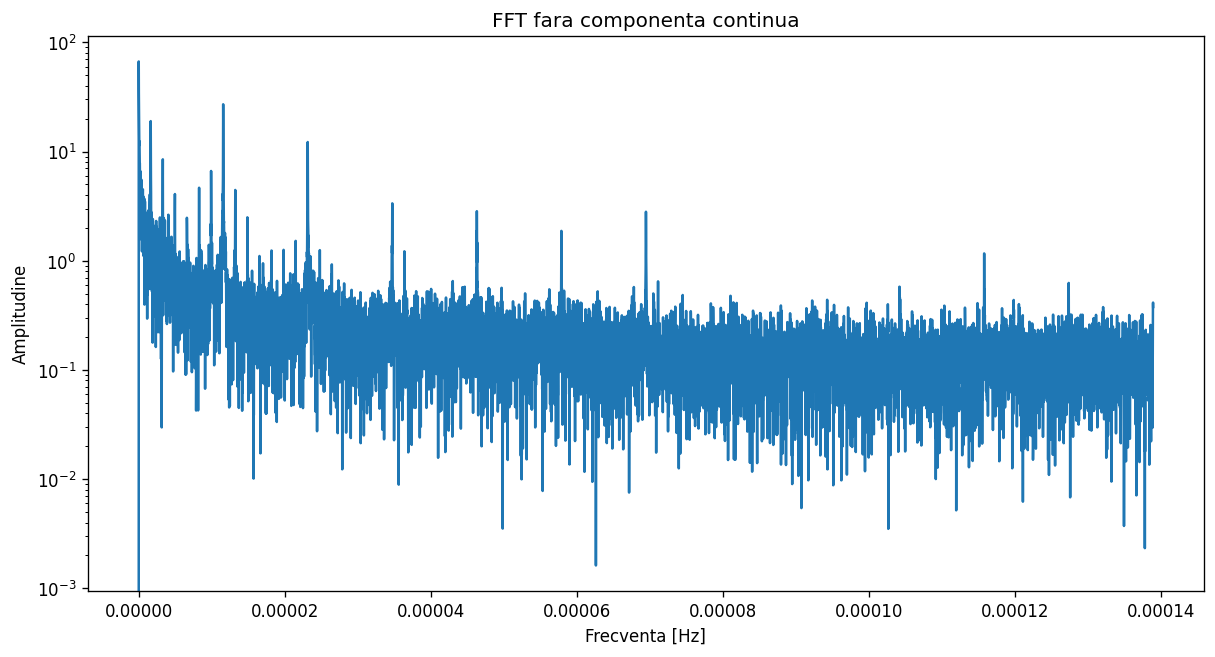

In [47]:
# e
# componenta continua este la 0Hz 138.95 ?
X[0] = 0

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(f, X)
# m.set_markerfacecolor("none")
ax.set_title("FFT fara componenta continua")
ax.set_xlabel("Frecventa [Hz]")
ax.set_ylabel("Amplitudine")
ax.set_yscale("log")
# plt.setp(baseline, linewidth=0)
plt.plot()

In [48]:
# f
ind_max = np.argpartition(X, -4)[-4:]
print(f[ind_max])

perioade_zile = 1 / f[ind_max] * 1 / 3600 / 24
perioade_zile

# a doua perioada este de 1 zi ceea ce pare sa aiba sens, restul nu prea

[4.55722046e-08 1.15753400e-05 3.03814697e-08 1.51907349e-08]


array([253.97222222,   0.99989064, 380.95833333, 761.91666667])

[]

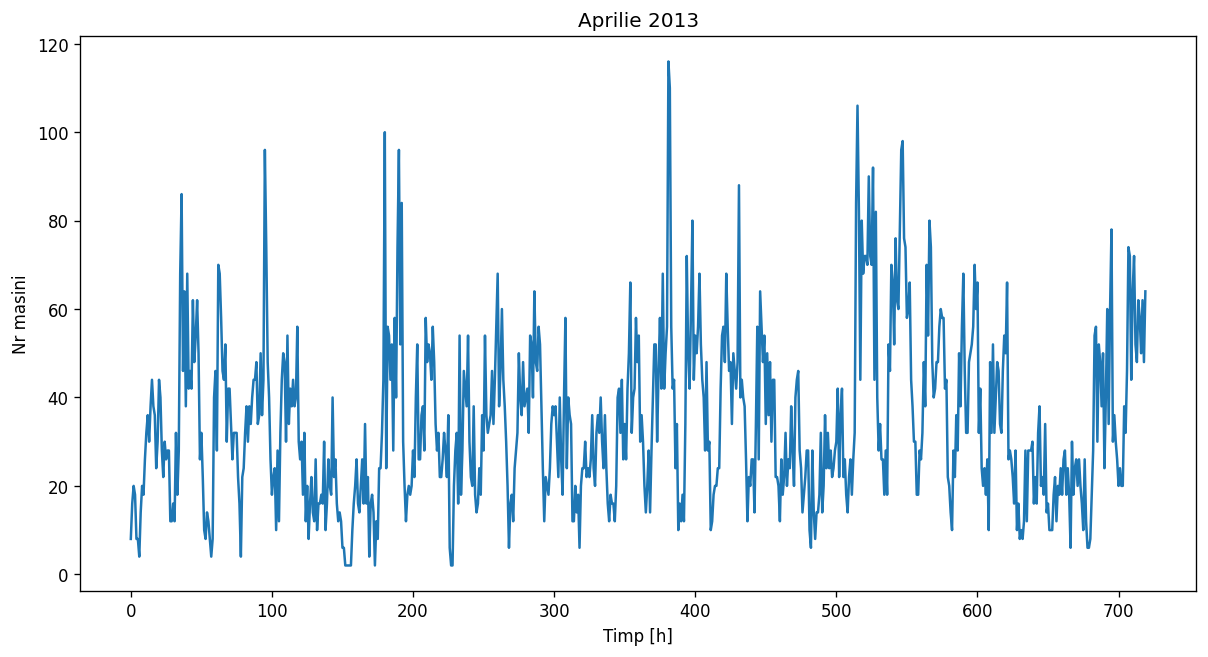

In [49]:
# g
# aprilie 2013 incepe intr-o luni
start_index = x_csv.index[x_csv["Datetime"] == "01-04-2013 00:00"].tolist()[0]
stop_index = x_csv.index[x_csv["Datetime"] == "01-05-2013 00:00"].tolist()[0]

x_apr = x[start_index:stop_index, 2]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x_apr)
ax.set_title("Aprilie 2013")
ax.set_xlabel("Timp [h]")
ax.set_ylabel("Nr masini")

plt.plot()

In [50]:
# h

[]

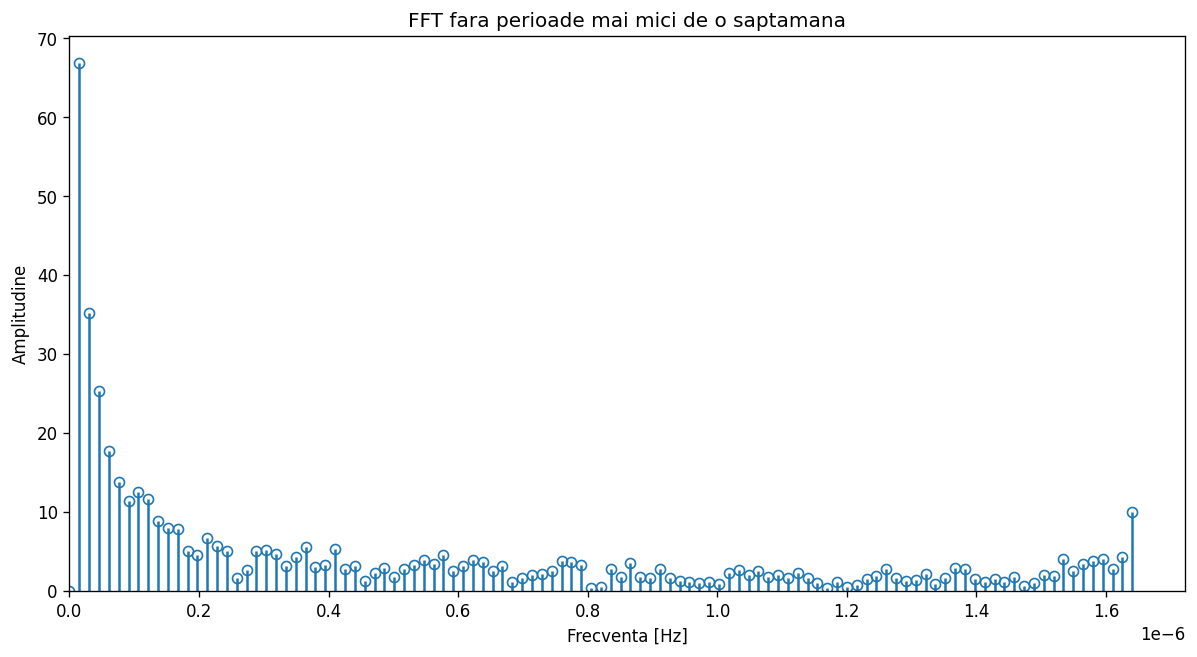

In [51]:
# i
filter_freq = 1 / (7 * 24 * 3600)

fig, ax = plt.subplots(figsize=(12, 6))


m, n, baseline = ax.stem(f[f < filter_freq], X[f < filter_freq])
m.set_markerfacecolor("none")
ax.set_title("FFT fara perioade mai mici de o saptamana")
ax.set_xlabel("Frecventa [Hz]")
ax.set_ylabel("Amplitudine")
ax.set_ylim(bottom=0)
ax.set_xlim(left=0)
plt.setp(baseline, linewidth=0)
plt.plot()